<a href="https://colab.research.google.com/github/Jean-Carlo-Torres/reconhecimento_de_imagens_com_dl/blob/main/Reconhecimento_de_imagens_com_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!wget https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

--2025-02-14 19:24:11--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.98.207, 74.125.197.207, 74.125.135.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.98.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   186MB/s    in 0.4s    

2025-02-14 19:24:11 (186 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [7]:
!unzip cats_and_dogs_filtered.zip

Archive:  cats_and_dogs_filtered.zip
   creating: cats_and_dogs_filtered/
  inflating: cats_and_dogs_filtered/vectorize.py  
   creating: cats_and_dogs_filtered/validation/
   creating: cats_and_dogs_filtered/train/
   creating: cats_and_dogs_filtered/validation/dogs/
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2127.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2126.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2125.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2124.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2123.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2122.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2121.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2120.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2119.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2118.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2117.

In [8]:
!rm -rf cats_and_dogs_filtered.zip

In [9]:
!pip install tensorflow

In [10]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf

In [12]:
# Define o diretório base do dataset, assumindo que ele está na pasta atual (cwd)
dataset_dir = os.path.join(os.getcwd(), 'cats_and_dogs_filtered')

# Define o diretório que contém os dados de treinamento
dataset_train_dir = os.path.join(dataset_dir, 'train')

# Conta o número de imagens de gatos e cães na pasta de treinamento
dataset_train_cats_len = len(os.listdir(os.path.join(dataset_train_dir, 'cats')))
dataset_train_dogs_len = len(os.listdir(os.path.join(dataset_train_dir, 'dogs')))

# Define o diretório que contém os dados de validação
dataset_validation_dir = os.path.join(dataset_dir, 'validation')

# Conta o número de imagens de gatos na pasta de validação
dataset_validation_cats_len = len(os.listdir(os.path.join(dataset_validation_dir, 'cats')))
dataset_validation_dogs_len = len(os.listdir(os.path.join(dataset_validation_dir, 'dogs')))

print('Total training cat images:', dataset_train_cats_len)
print('Total training dog images:', dataset_train_dogs_len)
print('Total validation cat images:', dataset_validation_cats_len)
print('Total validation dog images:', dataset_validation_dogs_len)

Total training cat images: 1000
Total training dog images: 1000
Total validation cat images: 500
Total validation dog images: 500


In [13]:
image_width = 160
image_height = 160
image_color_channel = 3
image_color_channel_size = 255
image_size = (image_width, image_height)
image_shape = image_size + (image_color_channel,)

batch_size = 32
epochs = 20
learning_rate = 0.0001

class_names = ['cat', 'dog']

In [14]:
# Conjunto de dados de imagens a partir do diretório de treinamento
dataset_train = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_train_dir,
    image_size=image_size,
    batch_size=batch_size,
    shuffle=True
)

Found 2000 files belonging to 2 classes.


In [15]:
# Conjunto de dados de imagens a partir do diretório de validação
dataset_validation = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_validation_dir,
    image_size=image_size,
    batch_size=batch_size,
    shuffle=True
)

Found 1000 files belonging to 2 classes.


In [17]:
# Obtém a cardinalidade (número de batches) do conjunto de validação
dataset_validation_cardinality = tf.data.experimental.cardinality(dataset_validation)

# Define o número de batches que serão usados para o conjunto de teste (1/5 do total de validação)
dataset_validation_batches = dataset_validation_cardinality // 5

# Separa uma parte do conjunto de validação para ser usada como conjunto de teste
dataset_test = dataset_validation.take(dataset_validation_batches)
dataset_validation = dataset_validation.skip(dataset_validation_batches)

print('Validation Dataset Cardinality: %d' % tf.data.experimental.cardinality(dataset_validation))
print('Test Dataset Cardinality: %d' % tf.data.experimental.cardinality(dataset_test))
print('Total Dataset Cardinality: %d' % (tf.data.experimental.cardinality(dataset_validation) + tf.data.experimental.cardinality(dataset_test)))

Validation Dataset Cardinality: 21
Test Dataset Cardinality: 5
Total Dataset Cardinality: 26


In [19]:
# Função para exibir as iamgem do dataset
def plot_dataset(dataset):
    plt.gcf().clear()
    plt.figure(figsize=(15, 15))
    for features, labels in dataset.take(1):
        for i in range(9):
            plt.subplot(3, 3, i + 1)
            plt.axis('off')
            plt.imshow(features[i].numpy().astype('uint8'))
            plt.title(class_names[labels[i]])
    plt.show()

<Figure size 640x480 with 0 Axes>

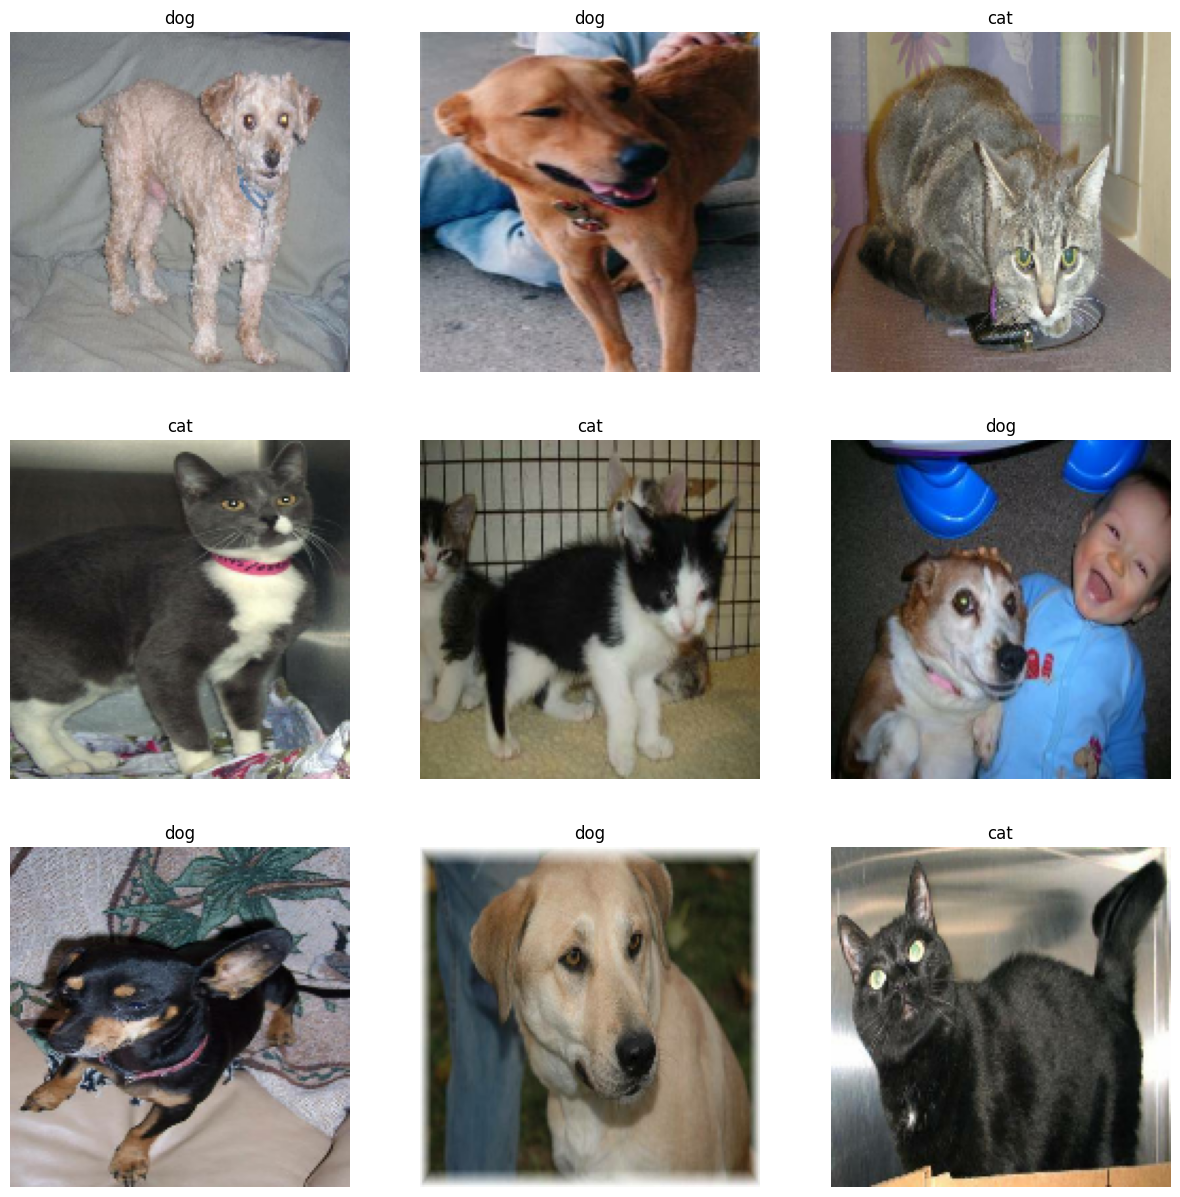

In [20]:
plot_dataset(dataset_train)

<Figure size 640x480 with 0 Axes>

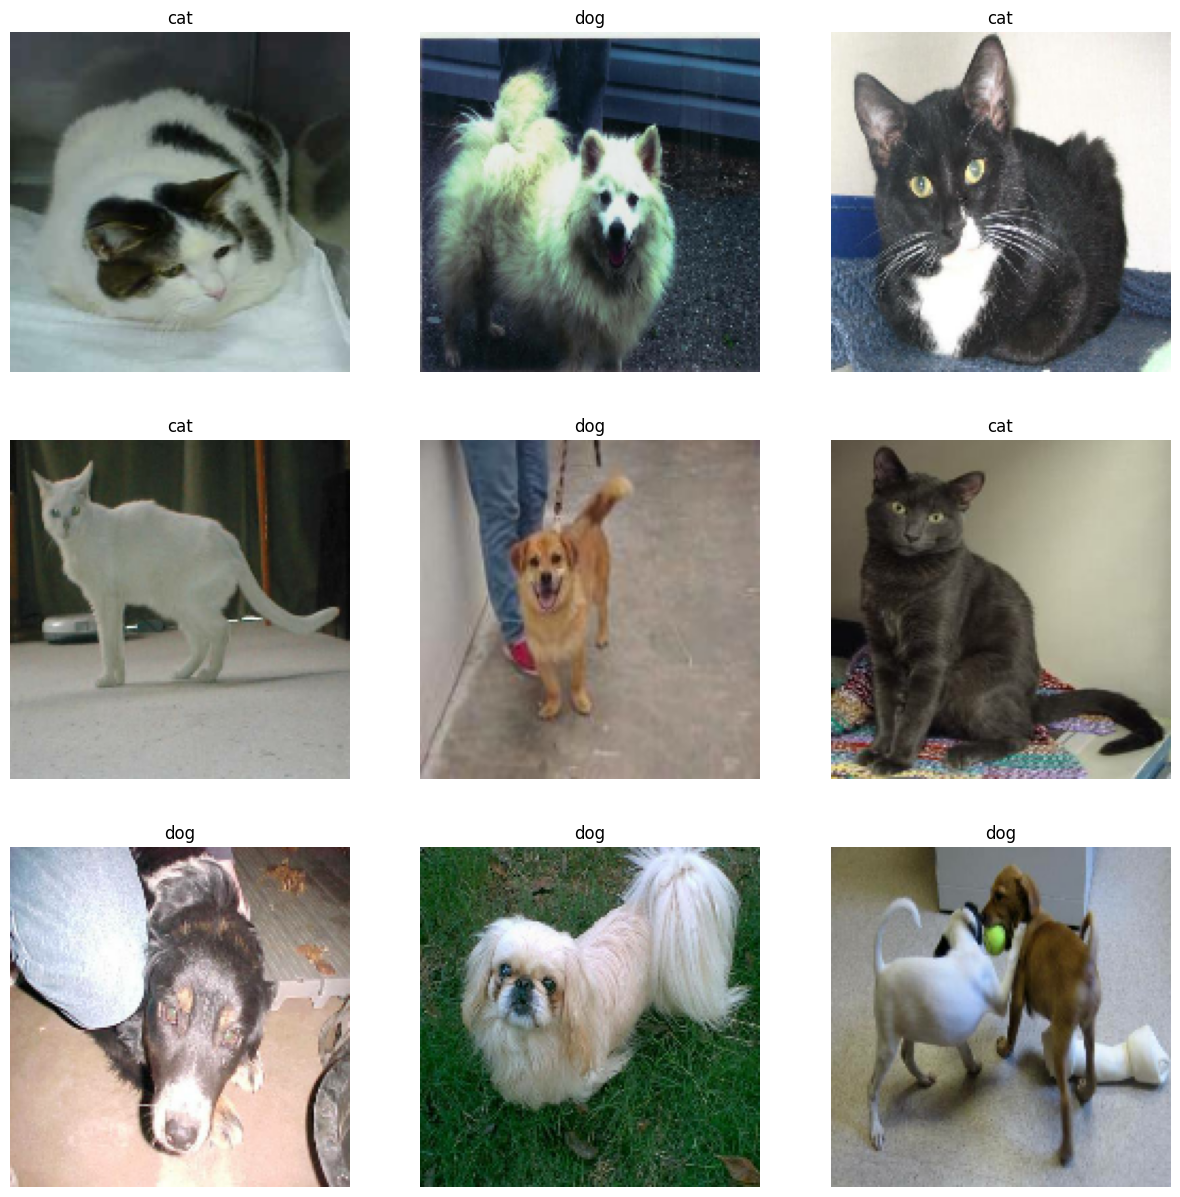

In [21]:
plot_dataset(dataset_validation)

<Figure size 640x480 with 0 Axes>

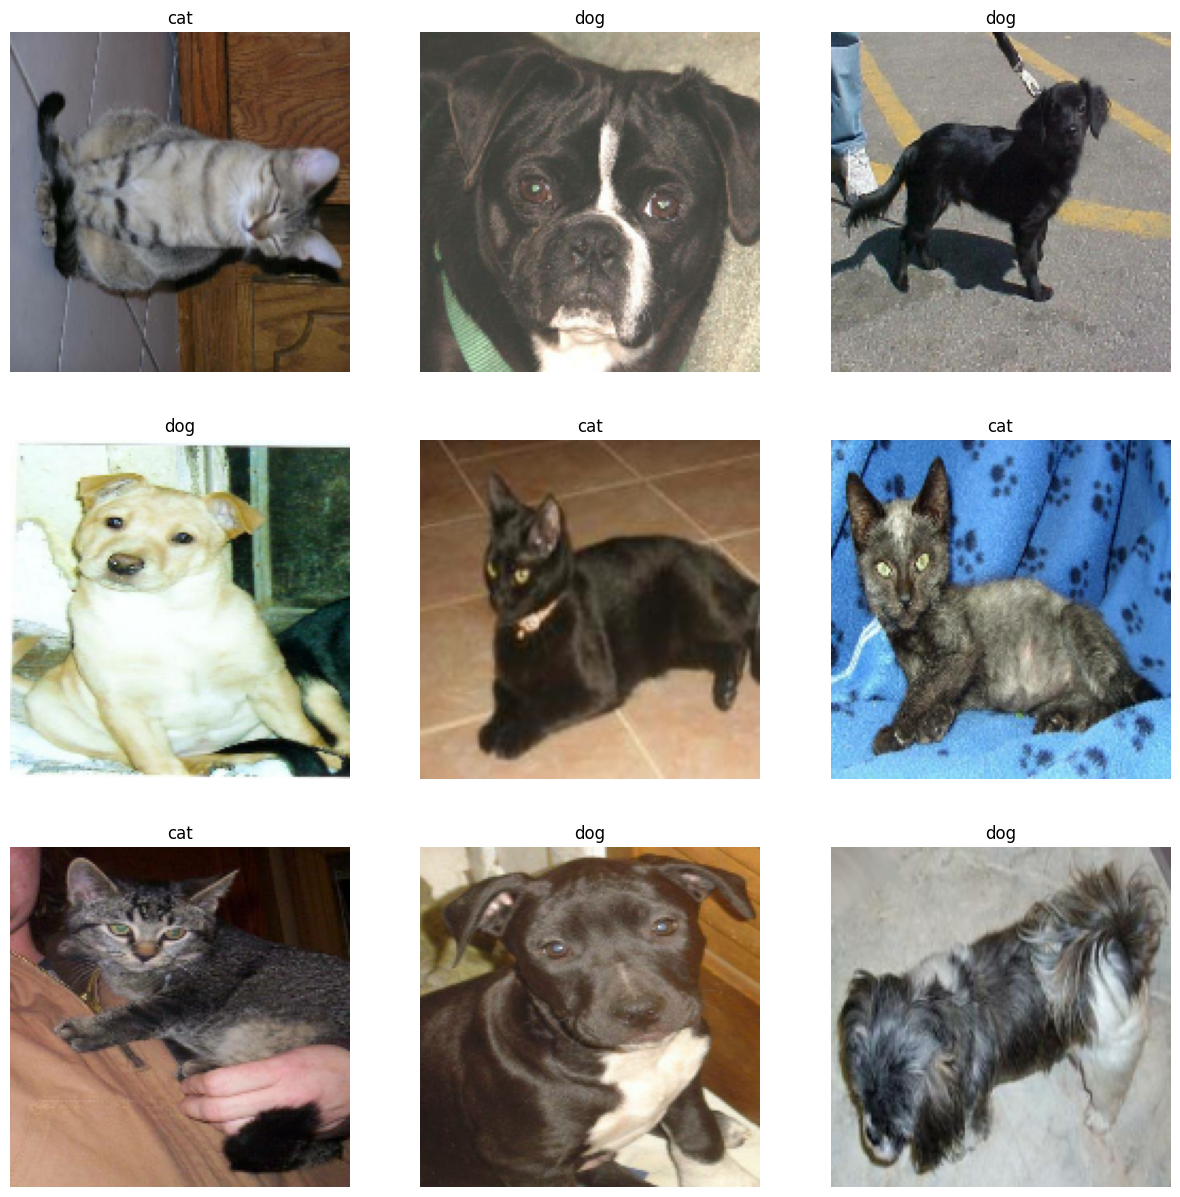

In [22]:
plot_dataset(dataset_test)

In [28]:
# Definição do modelo sequencial
model = tf.keras.models.Sequential([
    tf.keras.layers.Rescaling(
        1. / image_color_channel_size,
        input_shape=image_shape
    ),
    tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compilação do modelo
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=['accuracy']
)

# Exibe o resumo do modelo
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_2 (Rescaling)              │ (None, 160, 160, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 160, 160, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 80, 80, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 80, 80, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 40, 40, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 40, 40, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 20, 20, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 25600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │       3,276,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,300,641 (12.59 MB)

 Trainable params: 3,300,641 (12.59 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    dataset_train,
    validation_data=dataset_validation,
    epochs=epochs
)

Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 60s 919ms/step - accuracy: 0.5022 - loss: 0.7015 - val_accuracy: 0.6065 - val_loss: 0.6719
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 85s 976ms/step - accuracy: 0.5804 - loss: 0.6741 - val_accuracy: 0.6698 - val_loss: 0.6413
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 58s 918ms/step - accuracy: 0.6375 - loss: 0.6342 - val_accuracy: 0.6713 - val_loss: 0.6253
Epoch 4/20
19/63 ━━━━━━━━━━━━━━━━━━━━ 40s 910ms/step - accuracy: 0.6681 - loss: 0.5997